<a href="https://colab.research.google.com/github/danadler-dev/MDPI-Article-Evo/blob/main/HowInfoEvolves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gen 1: Counter({'A': 10, 'B': 10, 'C': 10})
Gen 2: Counter({'AB': 7, 'B': 6, 'BC': 6, 'C': 3, 'A': 2, 'AC': 1})
Gen 3: Counter({'BC': 11, 'AB': 10, 'B': 9, 'ABC': 8, 'C': 2, 'AC': 2})
Gen 4: Counter({'ABC': 18, 'BC': 12, 'AB': 11, 'B': 5, 'A': 2, 'C': 1})
Gen 5: Counter({'ABC': 26, 'AB': 18, 'BC': 11, 'B': 3, 'A': 1, 'C': 1})
Gen 6: Counter({'ABC': 38, 'AB': 13, 'BC': 10, 'B': 2, 'C': 1, 'A': 1})
Gen 7: Counter({'ABC': 52, 'AB': 11, 'BC': 9, 'A': 2, 'C': 2, 'B': 1})


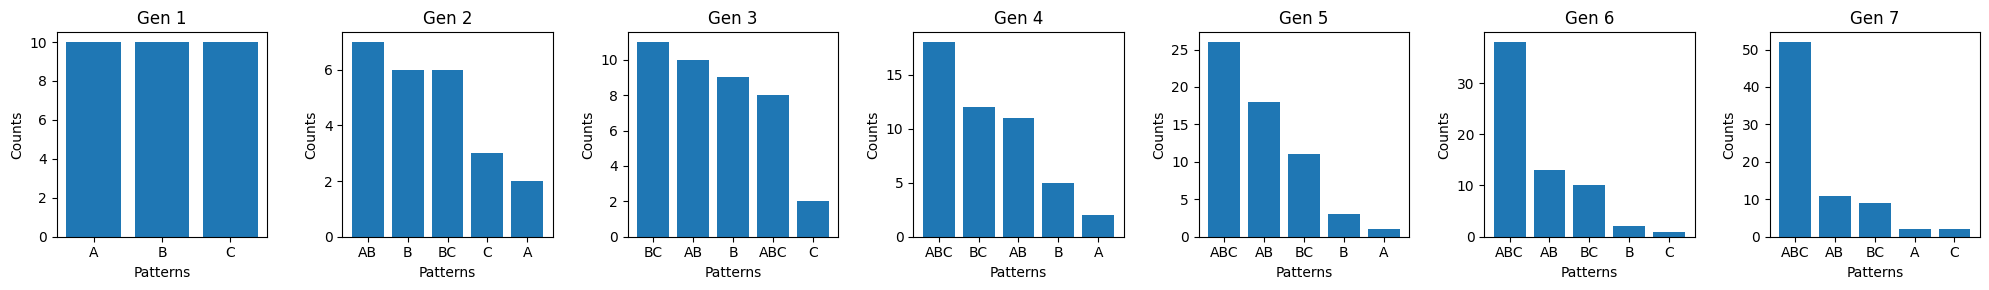

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population):
    """
    Simulate a simple case with three elements {A, B, C} and stability bias for compounds involving B.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.

    Returns:
        None: Plots the dynamics of the population over generations.
    """
    # Stability values for compounds
    stability = {
        "AB": 3, "BC": 3, "ABC": 5,  # High stability for B-compounds
        "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
    }

    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations,figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
       # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(5)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation+1}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
            symbol1, symbol2 = random.sample(population, 2)
            compound = "".join(sorted(symbol1 + symbol2))  # Sort to avoid duplicate representations
            if compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if random.random() < (stability.get(compound, 0) / 5):  # Normalize by max stability
                aged_population.append(compound)
        population = aged_population



        print(f"Gen {generation+1}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for the simulation
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}  # Regenerate all elements equally
initial_population = ["A", "B", "C"] * 10  # Initial population of base elements

# Run the simulation
simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population)


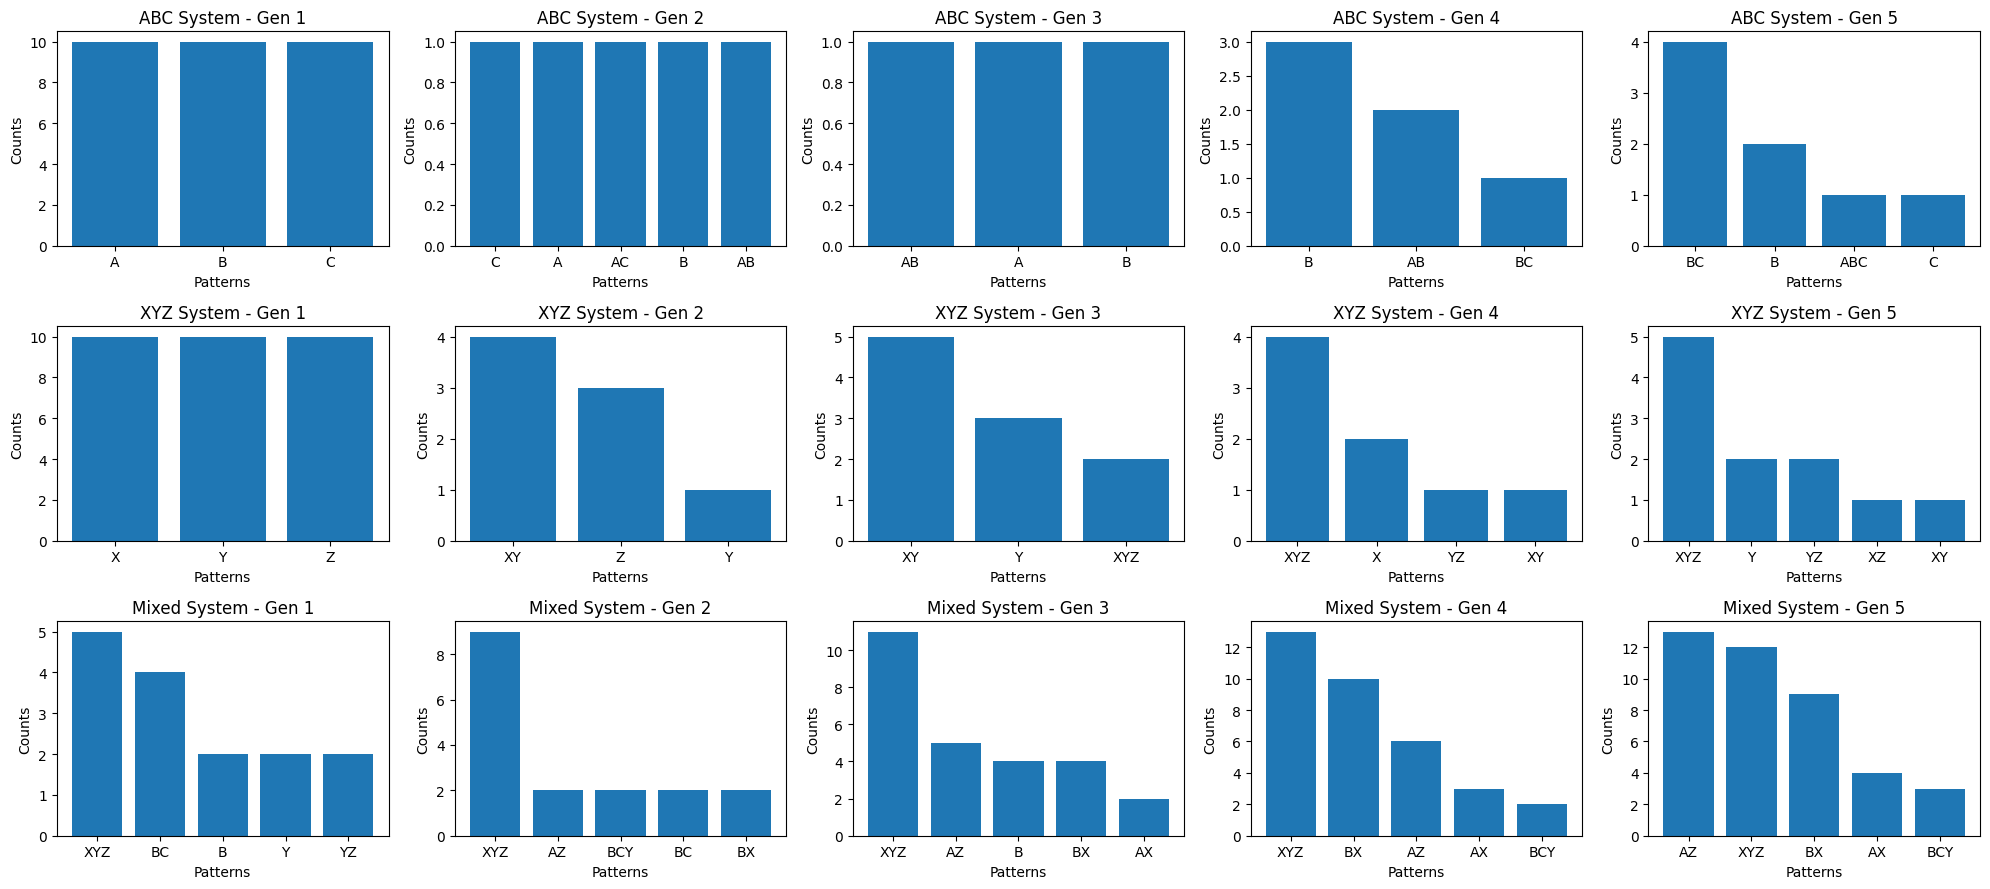

In [13]:
import random
import matplotlib.pyplot as plt
from collections import Counter

# Function to simulate a population system
def simulate_population(num_generations, interactions_per_generation, regeneration_rate, initial_population, stability):
    """
    Simulate a population with given stability constraints and regeneration rules.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.
        stability (dict): Stability values for compounds.

    Returns:
        list: Population history over generations.
    """
    population = initial_population.copy()
    population_history = []

    for generation in range(num_generations):
        population_history.append(Counter(population))  # Save population count for this generation

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
            symbol1, symbol2 = random.sample(population, 2)
            compound = "".join(sorted(symbol1 + symbol2))  # Sort to avoid duplicate representations
            if compound in stability:
                new_population.append(compound)
            else:
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if random.random() < (stability.get(compound, 0) / 20):  # Normalize by max stability (20 in this case)
                aged_population.append(compound)
        population = aged_population

    return population_history

# Function to plot population histories
def plot_population_histories(histories, titles):
    fig, axes = plt.subplots(len(histories), num_generations, figsize=(20, len(histories) * 3))
    if len(histories) == 1:
        axes = [axes]
    for row, (history, title) in enumerate(zip(histories, titles)):
        for generation, population_count in enumerate(history):
            top_patterns = population_count.most_common(5)  # Top 5 patterns
            labels, counts = zip(*top_patterns) if top_patterns else ([], [])
            axes[row][generation].bar(labels, counts)
            axes[row][generation].set_title(f"{title} - Gen {generation + 1}")
            axes[row][generation].set_xlabel("Patterns")
            axes[row][generation].set_ylabel("Counts")
    plt.tight_layout()
    plt.show()

# Parameters for simulation
num_generations = 5
interactions_per_generation = 50

# Define ABC population parameters
abc_stability = {"AB": 3, "BC": 3, "ABC": 5, "AC": 1, "A": 1, "B": 2, "C": 1}
abc_regeneration_rate = {"A": 5, "B": 5, "C": 5}
abc_initial_population = ["A", "B", "C"] * 10

# Define XYZ population parameters
xyz_stability = {"XY": 3, "YZ": 3, "XYZ": 5, "XZ": 1, "X": 1, "Y": 2, "Z": 1}
xyz_regeneration_rate = {"X": 5, "Y": 5, "Z": 5}
xyz_initial_population = ["X", "Y", "Z"] * 10

# Simulate individual populations
abc_history = simulate_population(num_generations, interactions_per_generation, abc_regeneration_rate, abc_initial_population, abc_stability)
xyz_history = simulate_population(num_generations, interactions_per_generation, xyz_regeneration_rate, xyz_initial_population, xyz_stability)

# Prepare the mixed initial population from the last generations of ABC and XYZ histories
mixed_initial_population = list(abc_history[-1].elements()) + list(xyz_history[-1].elements())

# Define maximized stability constraints for the mixed system
maximized_mixed_stability = {
    **abc_stability,
    **xyz_stability,
    # Maximize cross-system interaction stability
    "ABX": 15, "BCY": 15, "CXY": 15, "AYZ": 15, "XZB": 15, "XYZ": 12, "ACZ": 12,
    "AX": 20, "BX": 18, "CY": 18, "AY": 20, "AZ": 20  # Maximum stability between ABC and XYZ elements
}

# Simulate the mixed population with maximized stability
mixed_history_maximized_mixed = simulate_population(
    num_generations, interactions_per_generation,
    {**abc_regeneration_rate, **xyz_regeneration_rate},
    mixed_initial_population, maximized_mixed_stability
)

# Plot the results
plot_population_histories(
    [abc_history, xyz_history, mixed_history_maximized_mixed],
    ["ABC System", "XYZ System", "Mixed System"]
)


CA Rules

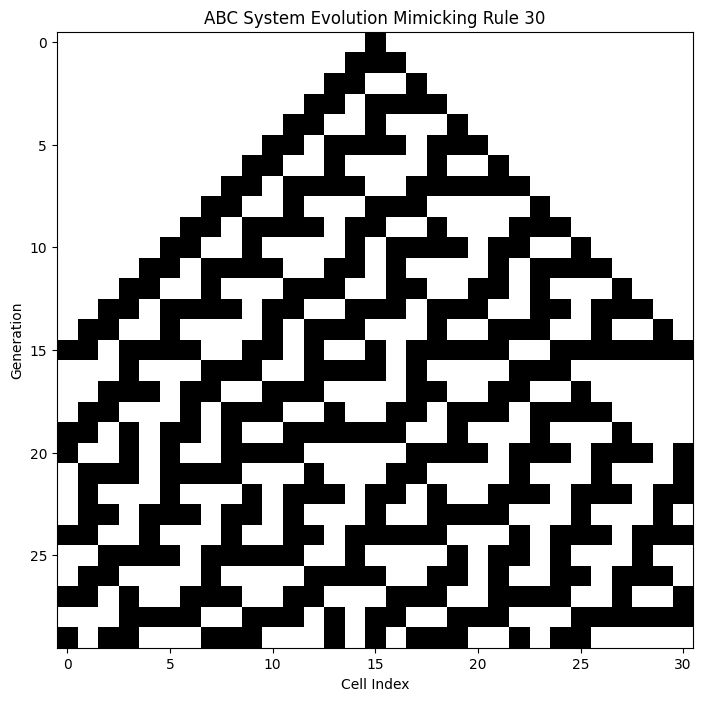

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_abc_system(size):
    """
    Initializes an ABC system with a single 'B' element at the center.

    Parameters:
        size (int): Number of cells in the system.

    Returns:
        list: Initial state of the system.
    """
    state = ['A'] * size
    state[size // 2] = 'B'  # Place a single 'B' in the center
    return state

def evolve_abc_system_with_stability(state, generations, stability_rules):
    """
    Evolves an ABC system based on stability rules over generations.

    Parameters:
        state (list): Initial state of the system.
        generations (int): Number of generations to simulate.
        stability_rules (dict): Stability rules based on patterns and their priority outcomes.

    Returns:
        np.ndarray: Array representing the evolution of the system.
    """
    size = len(state)
    evolution = []
    evolution.append(state)

    for _ in range(generations - 1):
        new_state = []
        for i in range(size):
            left = state[(i - 1) % size]  # Wrap around for periodic boundaries
            center = state[i]
            right = state[(i + 1) % size]
            triplet = (left, center, right)

            # Apply the stability rules
            # Rules implicitly encode stability, e.g., S(A, B) = 0.9 means triplets involving 'A' and 'B'
            # prioritize 'B' as the next state. Similarly, S(B, C) = 0.7 biases towards retaining 'B'.
            if triplet in stability_rules:
                new_state.append(stability_rules[triplet])
            else:
                # Default to maintaining the current state if no explicit rule applies
                new_state.append(center)

        evolution.append(new_state)
        state = new_state

    return np.array(evolution)

def plot_abc_system_with_stability(evolution):
    """
    Plots the evolution of an ABC system.

    Parameters:
        evolution (np.ndarray): Array representing the evolution of the system.
    """
    evolution_numeric = np.array([[ord(cell) for cell in row] for row in evolution])
    plt.figure(figsize=(12, 8))
    plt.imshow(evolution_numeric, cmap='binary', interpolation='none')
    plt.title("ABC System Evolution Mimicking Rule 30")
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

# Define stability rules based on patterns (mimicking Rule 30 logic)
# Stability rules reflect the idea of S(A, B) = 0.9 or S(B, C) = 0.7.
# For example:
# ('A', 'B', 'A') -> 'B' reflects the strong stability of B when interacting with A.
# ('B', 'A', 'B') -> 'B' reflects the preference for B due to higher S(B, A).
stability_rules = {
    ('B', 'B', 'B'): 'A',  # Lower stability for entirely 'B' compounds
    ('B', 'B', 'A'): 'A',
    ('B', 'A', 'B'): 'A',
    ('B', 'A', 'A'): 'B',  # Higher stability for mixed compounds favoring 'B'
    ('A', 'B', 'B'): 'B',
    ('A', 'B', 'A'): 'B',
    ('A', 'A', 'B'): 'B',
    ('A', 'A', 'A'): 'A',  # Default to 'A' for low-stability interactions
}

# Initialize the ABC system
size = 31  # Size of the system (odd to center the 'B')
generations = 30
initial_state = initialize_abc_system(size)

# Simulate the ABC system mimicking Rule 30 with stability rules
evolution = evolve_abc_system_with_stability(initial_state, generations, stability_rules)

# Plot the evolution of the ABC system
plot_abc_system_with_stability(evolution)


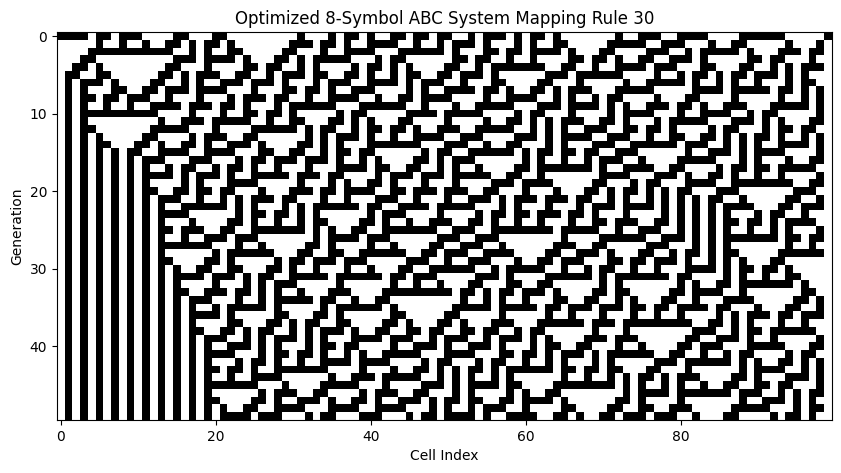

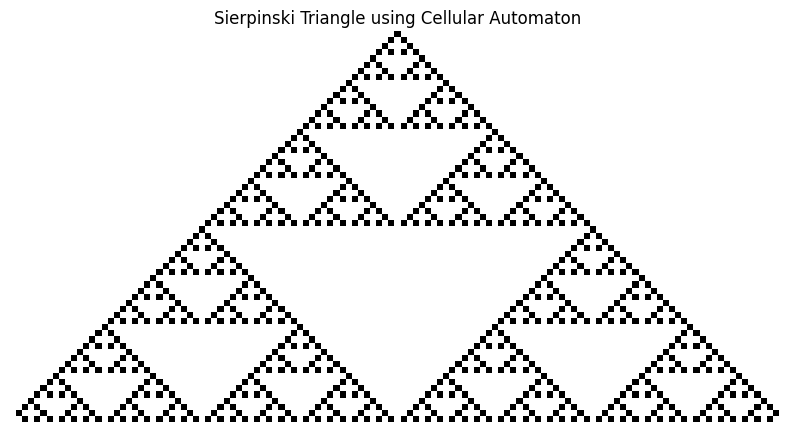

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given that we can evolve a xor function as shown above
# it may be able to further evolve to be applied to each row of a grid
# creating more complex fractal structures

def sierpinski_triangle(rows):
    # Initialize the grid with the given number of rows
    grid = np.zeros((rows, 2 * rows - 1), dtype=int)

    # Set the initial condition (center cell in the first row)
    grid[0, rows - 1] = 1

    # Apply Rule 90 to generate the triangle
    for i in range(1, rows):
        for j in range(1, 2 * rows - 2):
            # Rule 90: XOR of the left and right neighbors
            grid[i, j] = grid[i - 1, j - 1] ^ grid[i - 1, j + 1]

    return grid

def plot_sierpinski(grid):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.axis('off')
    plt.title("Sierpinski Triangle using Cellular Automaton")
    plt.show()

# Parameters
rows = 64  # Number of rows in the triangle

# Generate and plot the Sierpinski triangle
triangle = sierpinski_triangle(rows)
plot_sierpinski(triangle)


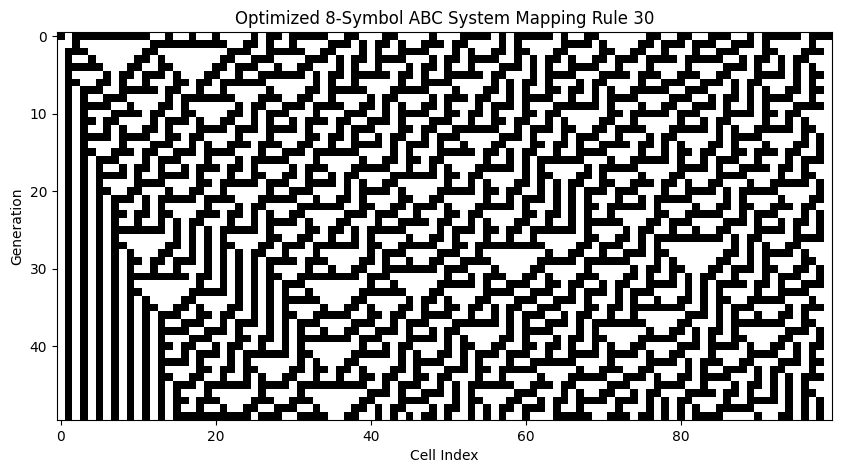

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

def initialize_symbols():
    """
    Initialize the mapping of triplets to unique symbols for the 8-symbol ABC system.
    """
    return {
        (1, 1, 1): "A",
        (1, 1, 0): "B",
        (1, 0, 1): "C",
        (1, 0, 0): "D",
        (0, 1, 1): "E",
        (0, 1, 0): "F",
        (0, 0, 1): "G",
        (0, 0, 0): "H",
    }

def initialize_optimized_stability():
    """
    Define optimized stability constraints for the 8 symbols based on Rule 30 transitions.
    """
    # Stability constraints are set to align with Rule 30's truth table
    return {
        "A": {"H": 0.9},  # (1, 1, 1) -> 0
        "B": {"H": 0.9},  # (1, 1, 0) -> 0
        "C": {"H": 0.9},  # (1, 0, 1) -> 0
        "D": {"F": 0.9},  # (1, 0, 0) -> 1
        "E": {"F": 0.9},  # (0, 1, 1) -> 1
        "F": {"F": 0.9},  # (0, 1, 0) -> 1
        "G": {"F": 0.9},  # (0, 0, 1) -> 1
        "H": {"H": 0.9},  # (0, 0, 0) -> 0
    }

def abc_rule30_optimized(size, generations):
    """
    Simulate an optimized 8-symbol ABC system mapping Rule 30 through stability-driven interactions.

    Args:
        size (int): Number of cells in the row.
        generations (int): Number of generations to simulate.

    Returns:
        numpy.ndarray: 2D array representing the state of the system over generations.
    """
    symbol_map = initialize_symbols()
    stability = initialize_optimized_stability()

    # Reverse mapping for decoding symbols back to triplets
    reverse_map = {v: k for k, v in symbol_map.items()}

    # Initialize the grid with random 0s and 1s
    grid = np.zeros((generations, size), dtype=int)
    grid[0, :] = np.random.choice([0, 1], size=size)

    def determine_next_state(left, center, right):
        """
        Determine the next state based on optimized stability constraints for the symbols.
        """
        triplet = (left, center, right)
        symbol = symbol_map[triplet]
        interactions = stability.get(symbol, {})
        if interactions:
            next_symbol = random.choices(
                list(interactions.keys()), weights=list(interactions.values()), k=1
            )[0]
            return reverse_map[next_symbol][1]  # Use the center of the triplet
        return reverse_map[symbol][1]

    # Simulate the generations
    for t in range(1, generations):
        for i in range(1, size - 1):  # Avoid boundaries for simplicity
            left = grid[t - 1, i - 1]
            center = grid[t - 1, i]
            right = grid[t - 1, i + 1]
            grid[t, i] = determine_next_state(left, center, right)

    return grid

def plot_abc_rule30_optimized(grid):
    """
    Plot the output of the optimized 8-symbol ABC system simulation mapping Rule 30.

    Args:
        grid (numpy.ndarray): 2D array representing the state of the system.
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(grid, cmap="binary", interpolation="nearest")
    plt.title("Optimized 8-Symbol ABC System Mapping Rule 30")
    plt.xlabel("Cell Index")
    plt.ylabel("Generation")
    plt.show()

# Parameters
size = 100          # Number of cells in the row
generations = 50    # Number of generations to simulate

# Run the simulation
grid = abc_rule30_optimized(size, generations)

# Plot the result
plot_abc_rule30_optimized(grid)


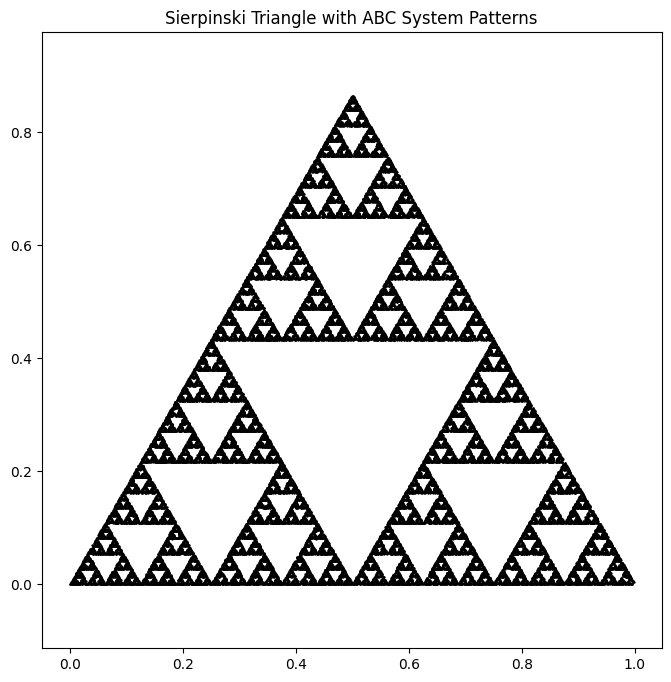

In [1]:
import matplotlib.pyplot as plt
import random

def sierpinski_abc_system(num_points):
    """
    Simulate a Sierpinski Triangle using an ABC system approach.

    Args:
        num_points (int): Number of points to generate.

    Returns:
        None: Plots the Sierpinski triangle.
    """
    # Define triangle vertices as base elements (A, B, C)
    vertices = {"A": (0, 0), "B": (1, 0), "C": (0.5, 0.866)}  # Equilateral triangle
    stability = {"A": 1, "B": 1, "C": 1, "AB": 2, "AC": 2, "BC": 2, "ABC": 3}  # Stability rules

    # Initialize the current point and storage for points
    current_point = vertices["A"]  # Start at one of the vertices
    points = [current_point]

    for _ in range(num_points):
        # Randomly select a vertex based on its stability
        chosen_vertex = random.choices(list(vertices.keys()), weights=[stability[v] for v in vertices.keys()])[0]

        # Move halfway toward the chosen vertex
        target_vertex = vertices[chosen_vertex]
        current_point = (
            (current_point[0] + target_vertex[0]) / 2,
            (current_point[1] + target_vertex[1]) / 2,
        )

        # Store the new point
        points.append(current_point)

    # Extract x and y coordinates for plotting
    x_coords, y_coords = zip(*points)

    # Plot the resulting points
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, s=0.5, color='black')
    plt.title("Sierpinski Triangle with ABC System Patterns")
    plt.axis("equal")
    plt.show()

# Run the simulation
sierpinski_abc_system(num_points=50000)
